In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy.signal import medfilt

In [2]:
losses = []
i = 2
with open("../../../analysis/learning_curve/training_curve_first.csv","r") as f:
    for i, row in enumerate(f):
        
        try:
            #print(row)
            lossD = float(row.split(" ")[2])
            lossG =  float(row.split(" ")[4])
            errD = float(row.split(" ")[6])
            errG = float(row.split(" ")[8])
            losses.append((lossD, lossG, errD, errG))
        except IndexError:
            pass
print i
with open("../../../analysis/learning_curve/training_curve_second.csv","r") as f:
    for i, row in enumerate(f):
        if i < 7*24:
            try:
                #print(row)
                lossD = float(row.split(" ")[2])
                lossG =  float(row.split(" ")[4])
                errD = float(row.split(" ")[6])
                errG = float(row.split(" ")[8])
                losses.append((lossD, lossG, errD, errG))
            except IndexError:
                pass
        
with open("../../../analysis/learning_curve/training_curve_third.csv","r") as f:
    for i, row in enumerate(f):
        if i < 14000:
            try:
                #print(row)
                lossD = float(row.split(" ")[2])
                lossG =  float(row.split(" ")[4])
                errD = float(row.split(" ")[6])
                errG = float(row.split(" ")[8])
                losses.append((lossD, lossG, errD, errG))
            except IndexError:
                pass
losses = np.array(losses)
print(losses.shape)
print(losses)

7508
(12153L, 4L)
[[  2.55580000e+00   9.57600000e-01   1.44400000e-01   1.42500000e-01]
 [  6.78690000e+00   4.54250000e+00   9.17600000e-01   9.93600000e-01]
 [  3.09630000e+00   9.45680000e+00   7.63100000e-01   8.50100000e-01]
 ..., 
 [  3.31700000e-01   6.40350000e+00   8.96400000e-01   2.30000000e-03]
 [  3.33500000e-01   5.81550000e+00   8.77400000e-01   2.10000000e-03]
 [  3.37300000e-01   6.46900000e+00   9.22200000e-01   4.10000000e-03]]


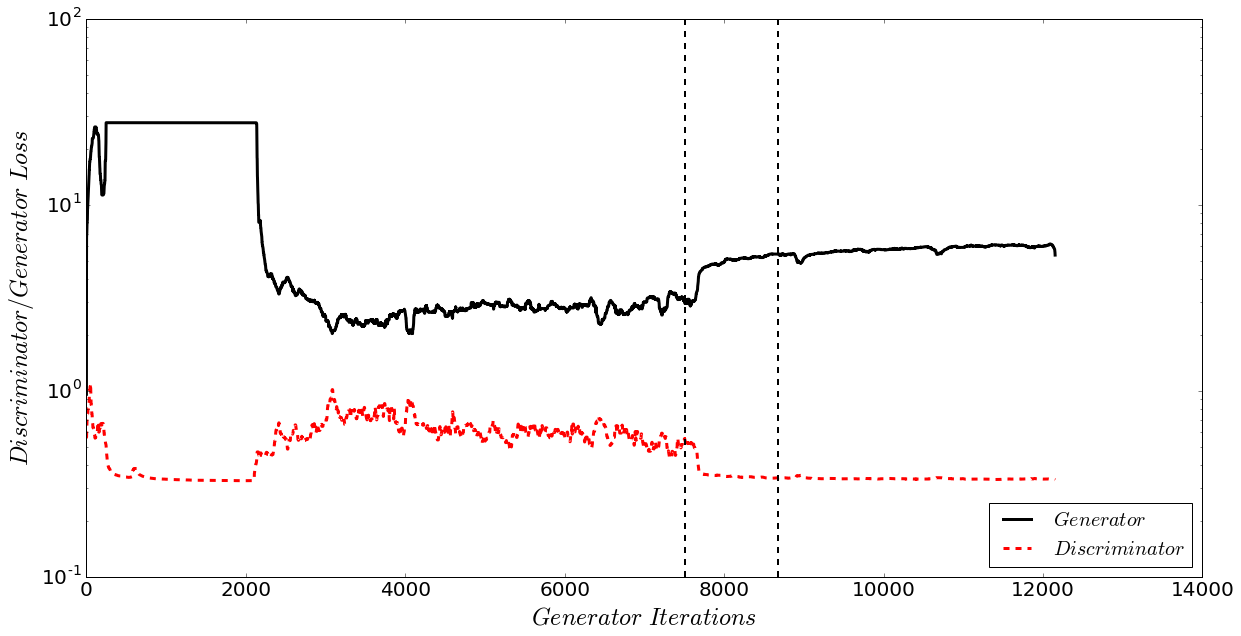

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
n = 101
w = 3
labelsize = 24
ticksize = 20
legendsize = 20

ax.semilogy(range(losses.shape[0]),  medfilt(losses[:, 1], n), color="black", linewidth=w, label=r"$Generator$")
ax.semilogy(range(losses.shape[0]),  medfilt(losses[:, 0], n), color="red", linestyle="--", linewidth=w, label=r"$Discriminator$")


ax.axvline(7508, linestyle="--", linewidth=2, color="black")
ax.axvline(7508+7*167, linestyle="--", linewidth=2, color="black")
ax.set_xlabel(r"$Generator \ Iterations$", fontsize=labelsize)
ax.set_ylabel(r"$Discriminator/Generator \ Loss$", fontsize=labelsize)
ax.set_ylim(1e-1, 1e2)
for item in ax.get_xticklabels():
    item.set_fontsize(ticksize)
for item in ax.get_yticklabels():
    item.set_fontsize(ticksize)
ax.legend(fontsize=legendsize, loc=4)
fig.savefig("../../../paper/figures/berea_training_curve.png", bbox_extra_artists=None, bbox_inches='tight', dpi=300)